In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [2]:
titanic_data = fetch_openml("titanic",version = 1, as_frame = True)

In [3]:
df = titanic_data["data"]

In [4]:
df['survived']= titanic_data['target']

In [5]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


How many people have survived and how many people have not survived

<Axes: xlabel='survived', ylabel='count'>

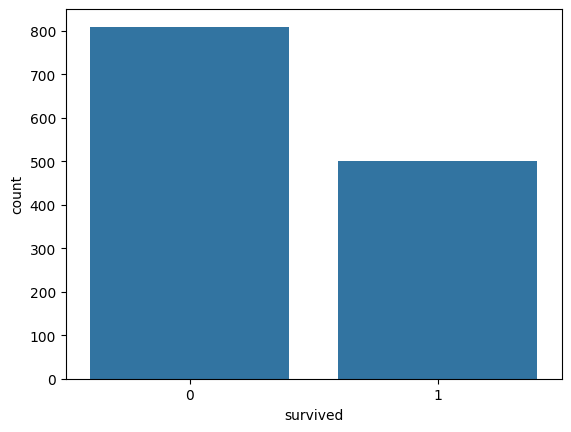

In [6]:
sns.countplot(x = 'survived', data = df)

<Axes: xlabel='survived', ylabel='count'>

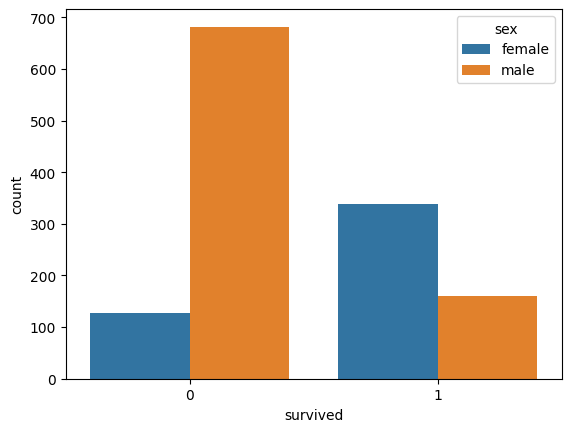

In [7]:
sns.countplot(x = 'survived', hue = "sex",data = df)

<Axes: xlabel='survived', ylabel='count'>

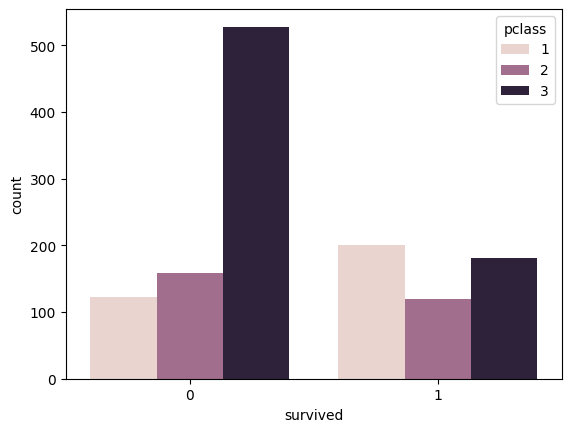

In [8]:
sns.countplot(x = 'survived', hue = "pclass",data = df)

<Axes: ylabel='Frequency'>

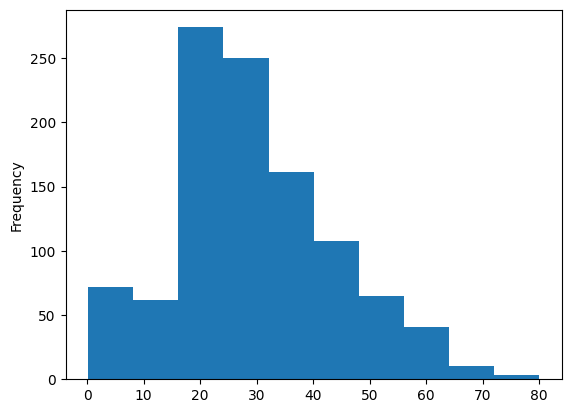

In [9]:
df['age'].plot.hist()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


In [11]:
df.isnull().sum()

,0
pclass,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014
embarked,2


<Axes: title={'center': 'Missing Values in percentage'}, ylabel='percentage'>

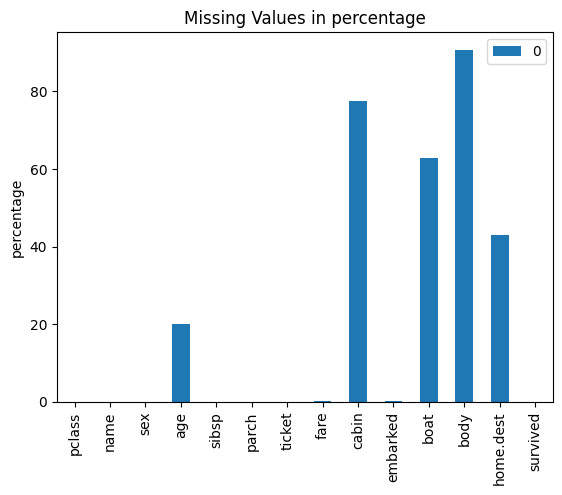

In [12]:
miss_vals = pd.DataFrame(df.isnull().sum()/len(df)* 100)
miss_vals.plot(kind = 'bar',title = 'Missing Values in percentage', ylabel ='percentage')

In [13]:
df['family'] = df['sibsp']+ df['parch']
df.loc[df['family']> 0,'traveled_alone'] = 0
df.loc[df['family'] == 0,'traveled_alone'] = 1

In [14]:
df['family'].head()

,family
0,0
1,3
2,3
3,3
4,3


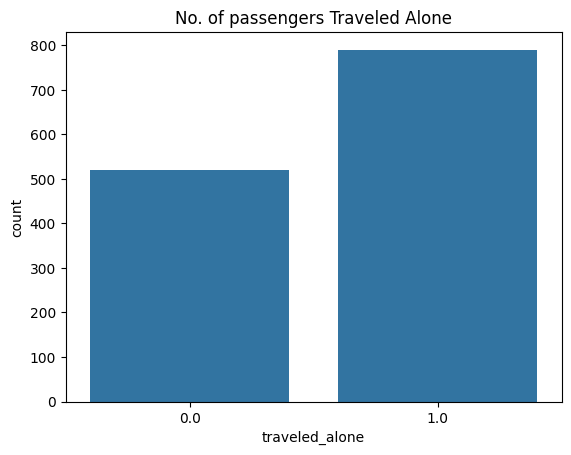

In [15]:
df.drop(['sibsp','parch'], axis = 1, inplace = True)
sns.countplot(x = 'traveled_alone', data = df)
plt.title('No. of passengers Traveled Alone')
plt.show()

<Axes: xlabel='survived', ylabel='count'>

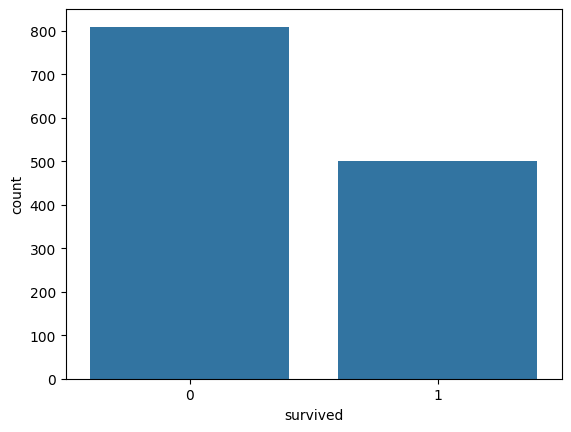

In [16]:
sns.countplot(x = 'survived', data = df)

In [17]:
df.head()

,pclass,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,traveled_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0


Removing unwanted features

In [18]:
df.drop(['name','ticket','home.dest'],axis = 1, inplace = True)

In [19]:
df.head()

,pclass,sex,age,fare,cabin,embarked,boat,body,survived,family,traveled_alone
0,1,female,29.0000,211.3375,B5,S,2,NaN,1,0,1.0
1,1,male,0.9167,151.5500,C22 C26,S,11,NaN,1,3,0.0
2,1,female,2.0000,151.5500,C22 C26,S,NaN,NaN,0,3,0.0
3,1,male,30.0000,151.5500,C22 C26,S,NaN,135.0,0,3,0.0
4,1,female,25.0000,151.5500,C22 C26,S,NaN,NaN,0,3,0.0


In [20]:
df.drop(['cabin','body','boat'],axis = 1, inplace = True)

In [21]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,traveled_alone
0,1,female,29.0000,211.3375,S,1,0,1.0
1,1,male,0.9167,151.5500,S,1,3,0.0
2,1,female,2.0000,151.5500,S,0,3,0.0
3,1,male,30.0000,151.5500,S,0,3,0.0
4,1,female,25.0000,151.5500,S,0,3,0.0


Value imputation ,words like male,female,etc


In [27]:
sex = pd.get_dummies(df['sex'],drop_first = True)
print(sex)

       male
0     False
1      True
2     False
3      True
4     False
...     ...
1304  False
1305  False
1306   True
1307   True
1308   True

[1309 rows x 1 columns]


In [28]:
df.isnull().sum()

,0
pclass,0
sex,0
age,0
fare,0
embarked,2
survived,0
family,0
traveled_alone,0


Simple imputer module (usning mean)

In [29]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')

In [30]:
df['age'] = imp_mean.fit_transform(df[['age']])
df['fare'] = imp_mean.fit_transform(df[['fare']])

In [31]:
df.isnull().sum()

,0
pclass,0
sex,0
age,0
fare,0
embarked,2
survived,0
family,0
traveled_alone,0


In [32]:
imp_freq = SimpleImputer(strategy='most_frequent')

In [36]:
df['embarked'] = imp_freq.fit_transform(df[['embarked']]).ravel()

In [37]:
df.isnull().sum()

,0
pclass,0
sex,0
age,0
fare,0
embarked,0
survived,0
family,0
traveled_alone,0


All null values gone

In [38]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,traveled_alone
0,1,female,29.0000,211.3375,S,1,0,1.0
1,1,male,0.9167,151.5500,S,1,3,0.0
2,1,female,2.0000,151.5500,S,0,3,0.0
3,1,male,30.0000,151.5500,S,0,3,0.0
4,1,female,25.0000,151.5500,S,0,3,0.0


In [40]:
embark = pd.get_dummies(df['embarked'])
print(embark)

          C      Q      S
0     False  False   True
1     False  False   True
2     False  False   True
3     False  False   True
4     False  False   True
...     ...    ...    ...
1304   True  False  False
1305   True  False  False
1306   True  False  False
1307   True  False  False
1308  False  False   True

[1309 rows x 3 columns]


In [41]:
embark = pd.get_dummies(df['embarked'])
print(embark)

          C      Q      S
0     False  False   True
1     False  False   True
2     False  False   True
3     False  False   True
4     False  False   True
...     ...    ...    ...
1304   True  False  False
1305   True  False  False
1306   True  False  False
1307   True  False  False
1308  False  False   True

[1309 rows x 3 columns]


In [42]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for a dense array

# Fit the encoder to the 'embarked' column and transform it
embarked_encoded = encoder.fit_transform(df[['embarked']])

# Create a DataFrame from the encoded data
embarked_df = pd.DataFrame(embarked_encoded, columns=encoder.get_feature_names_out(['embarked']))

# Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df, embarked_df], axis=1)

# Drop the original 'embarked' column
df.drop('embarked', axis=1, inplace=True)

# Print the updated DataFrame
print(df.head())

   pclass     sex      age      fare survived  family  traveled_alone  \
0       1  female  29.0000  211.3375        1       0             1.0   
1       1    male   0.9167  151.5500        1       3             0.0   
2       1  female   2.0000  151.5500        0       3             0.0   
3       1    male  30.0000  151.5500        0       3             0.0   
4       1  female  25.0000  151.5500        0       3             0.0   

   embarked_C  embarked_Q  embarked_S  
0         0.0         0.0         1.0  
1         0.0         0.0         1.0  
2         0.0         0.0         1.0  
3         0.0         0.0         1.0  
4         0.0         0.0         1.0  


In [43]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder to the 'sex' column and transform it
sex_encoded = encoder.fit_transform(df[['sex']])

# Create a DataFrame from the encoded data
sex_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names_out(['sex']))

# Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df, sex_df], axis=1)

# Drop the original 'sex' column
df.drop('sex', axis=1, inplace=True)

# Print the updated DataFrame
print(df.head())

   pclass      age      fare survived  family  traveled_alone  embarked_C  \
0       1  29.0000  211.3375        1       0             1.0         0.0   
1       1   0.9167  151.5500        1       3             0.0         0.0   
2       1   2.0000  151.5500        0       3             0.0         0.0   
3       1  30.0000  151.5500        0       3             0.0         0.0   
4       1  25.0000  151.5500        0       3             0.0         0.0   

   embarked_Q  embarked_S  sex_female  sex_male  
0         0.0         1.0         1.0       0.0  
1         0.0         1.0         0.0       1.0  
2         0.0         1.0         1.0       0.0  
3         0.0         1.0         0.0       1.0  
4         0.0         1.0         1.0       0.0  


In [44]:
df.head()

,pclass,age,fare,survived,family,traveled_alone,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,29.0000,211.3375,1,0,1.0,0.0,0.0,1.0,1.0,0.0
1,1,0.9167,151.5500,1,3,0.0,0.0,0.0,1.0,0.0,1.0
2,1,2.0000,151.5500,0,3,0.0,0.0,0.0,1.0,1.0,0.0
3,1,30.0000,151.5500,0,3,0.0,0.0,0.0,1.0,0.0,1.0
4,1,25.0000,151.5500,0,3,0.0,0.0,0.0,1.0,1.0,0.0


Then we need to seperate feature data and labe;led data

In [45]:
X = df.drop(['survived'],axis = 1)
X.head()

,pclass,age,fare,family,traveled_alone,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,29.0000,211.3375,0,1.0,0.0,0.0,1.0,1.0,0.0
1,1,0.9167,151.5500,3,0.0,0.0,0.0,1.0,0.0,1.0
2,1,2.0000,151.5500,3,0.0,0.0,0.0,1.0,1.0,0.0
3,1,30.0000,151.5500,3,0.0,0.0,0.0,1.0,0.0,1.0
4,1,25.0000,151.5500,3,0.0,0.0,0.0,1.0,1.0,0.0


In [46]:
y = df['survived']
y.head()

,survived
0,1
1,1
2,0
3,0
4,0


Split data into training data and testing data

In [47]:
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state = 1)

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(916, 10)
(916,)
(393, 10)
(393,)


Appling Logistic Regression model

In [49]:
from sklearn.linear_model import LogisticRegression
mod= LogisticRegression()
mod.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
pred = mod.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7989821882951654

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[205,  31],
       [ 48, 109]])